In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        # how many layers?
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
        # Input layer (4 features) --> h1 N --> h2 N --> ouput (3 classes)
        
    
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [3]:
torch.manual_seed(32)
model = Model()

In [5]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../Data/iris.csv')

In [9]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


In [10]:
df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
X = X.values
y = y.values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

In [17]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [18]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
# how many epochs?
# an epoch is 1 run through all of the training datat

epochs = 100
losses = []

for i in range(epochs):
    # Forward and get a prediction
    
    y_pred = model.forward(X_train)
    
    # calculate loss
    loss = criterion(y_pred, y_train) # no need to OHE because cross entropy loss
    
    losses.append(loss)
    
    if i % 10 == 0:
        print(f'epoch {i} and loss is: {loss}')
        
    # Backpropagation
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 and loss is: 1.1507115364074707
epoch 10 and loss is: 0.9377316832542419
epoch 20 and loss is: 0.7798274755477905
epoch 30 and loss is: 0.6099672317504883
epoch 40 and loss is: 0.4008353650569916
epoch 50 and loss is: 0.2543700337409973
epoch 60 and loss is: 0.15052451193332672
epoch 70 and loss is: 0.10086153447628021
epoch 80 and loss is: 0.08127658814191818
epoch 90 and loss is: 0.07230933755636215


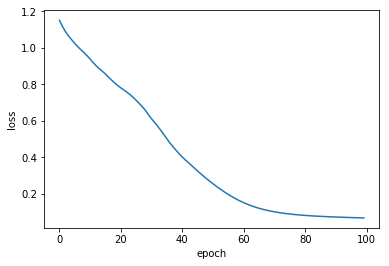

In [28]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch');

In [29]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [30]:
loss

tensor(0.0581)

In [35]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1}) {str(y_val)} {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct +=1
print(f'we got {correct} number correct!')

1) tensor([-2.1245,  4.8073, -0.8623]) 1
2) tensor([-1.7976,  5.3110, -1.5445]) 1
3) tensor([  6.3540,   0.8432, -10.0531]) 0
4) tensor([-3.9114,  4.5969,  1.1698]) 1
5) tensor([-7.4707,  3.2028,  5.7865]) 2
6) tensor([-10.4965,   1.6465,   9.6306]) 2
7) tensor([  6.3199,   0.9912, -10.1520]) 0
8) tensor([  7.0467,   0.7053, -10.9127]) 0
9) tensor([-7.2053,  3.3485,  5.3575]) 2
10) tensor([-9.3950,  2.5767,  8.1044]) 2
11) tensor([-9.8795,  2.3483,  8.7148]) 2
12) tensor([ 6.2747,  0.6650, -9.7604]) 0
13) tensor([-9.3131,  2.1888,  8.1954]) 2
14) tensor([-3.7796,  4.5061,  1.0759]) 1
15) tensor([-7.8646,  3.0127,  6.2310]) 2
16) tensor([-1.8859,  5.1583, -1.3341]) 1
17) tensor([-5.6999,  3.5039,  3.6704]) 2
18) tensor([  7.1788,   0.7363, -11.1340]) 0
19) tensor([-3.2937,  4.7942,  0.3480]) 1
20) tensor([-7.7657,  3.7639,  5.7106]) 2
21) tensor([  6.6498,   0.7883, -10.4241]) 0
22) tensor([  7.4356,   0.8912, -11.6589]) 0
23) tensor([-9.7573,  2.1751,  8.6661]) 2
24) tensor([  6.5769, 

In [36]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.1212, -0.4386, -0.4619, -0.0438],
                      [-0.3870,  0.0793,  0.1481, -0.4771],
                      [ 0.3719,  0.0894,  0.5771, -0.0468],
                      [ 0.7636,  0.6492, -0.4409, -1.3608],
                      [ 0.3509, -0.6458,  0.8176,  0.9495],
                      [ 0.4723,  0.9446, -0.7489, -1.1534],
                      [ 0.1646, -0.1114, -0.4213, -0.3553],
                      [-0.3191,  0.1440, -0.3496,  0.2280]])),
             ('fc1.bias',
              tensor([ 0.1859, -0.2029,  0.6705,  0.7744, -0.1637,  0.7040, -0.3122,  0.3781])),
             ('fc2.weight',
              tensor([[-0.2174,  0.0821,  0.1038, -0.3532, -0.4183,  0.1002, -0.3494, -0.2639],
                      [ 0.1729, -0.1185,  0.8347, -0.0941,  0.5682, -0.6716,  0.0699, -0.3265],
                      [-0.3545, -0.2716,  0.1349, -0.5668,  0.6432, -0.7774,  0.3048, -0.2101],
                      [-0.0737, -0.0607,  0.1771, 

In [39]:
# save file
torch.save(model.state_dict(), 'alex_my_iris_model.pt')

In [42]:
new_model = Model()
new_model.load_state_dict(torch.load('alex_my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [43]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [44]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [46]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9520,   1.5591, -10.0041])
tensor(0)
